In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

In [3]:
import pandas as pd

# Load the CSV file with proper encoding
df = pd.read_csv("sales_data_sample.csv", encoding='ISO-8859-1')


In [5]:
print(df.shape)         # Rows and columns  #explore the data (EDA)
print(df.columns)       # Column names
print(df.dtypes)        # Data types
print(df.head())        # First few rows


(2823, 25)
Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')
ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERR

In [6]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])


In [7]:
print(df.isnull().sum())   # Check missing values

# Example fixes:
df['ADDRESSLINE2'].fillna('N/A', inplace=True)
df['POSTALCODE'].fillna(0, inplace=True)
df['STATE'].fillna('Unknown', inplace=True)


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


C:\Users\mohan\AppData\Local\Temp\ipykernel_24760\166122953.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ADDRESSLINE2'].fillna('N/A', inplace=True)
C:\Users\mohan\AppData\Local\Temp\ipykernel_24760\166122953.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [8]:
# Total Revenue per row
df['TotalRevenue'] = df['QUANTITYORDERED'] * df['PRICEEACH']

# Extract year and month
df['Year'] = df['ORDERDATE'].dt.year
df['Month'] = df['ORDERDATE'].dt.month
df['MonthYear'] = df['ORDERDATE'].dt.to_period('M')


In [9]:
monthly_sales = df.groupby('MonthYear')['TotalRevenue'].sum().reset_index()
monthly_sales['MonthYear'] = monthly_sales['MonthYear'].astype(str)


In [10]:
top_products = df.groupby('PRODUCTLINE')['TotalRevenue'].sum().sort_values(ascending=False).reset_index()


In [11]:
sales_by_country = df.groupby('COUNTRY')['TotalRevenue'].sum().sort_values(ascending=False).reset_index()


In [12]:
pivot_table = pd.pivot_table(
    df,
    values='TotalRevenue',
    index='PRODUCTLINE',
    columns='Year',
    aggfunc='sum',
    fill_value=0
)


In [13]:
import matplotlib.pyplot as plt


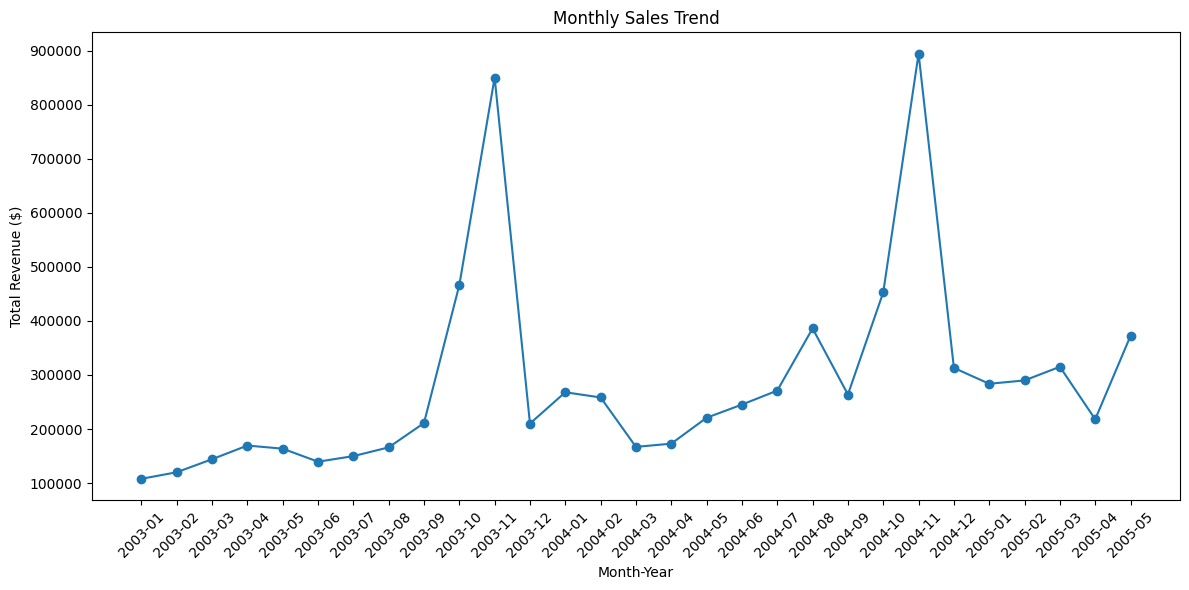

In [14]:
# ---------- 1. Monthly Sales Trend ----------

monthly_sales = df.groupby(df['ORDERDATE'].dt.to_period('M'))['TotalRevenue'].sum().reset_index()
monthly_sales['MonthYear'] = monthly_sales['ORDERDATE'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['MonthYear'], monthly_sales['TotalRevenue'], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month-Year")
plt.ylabel("Total Revenue ($)")
plt.tight_layout()
plt.show()


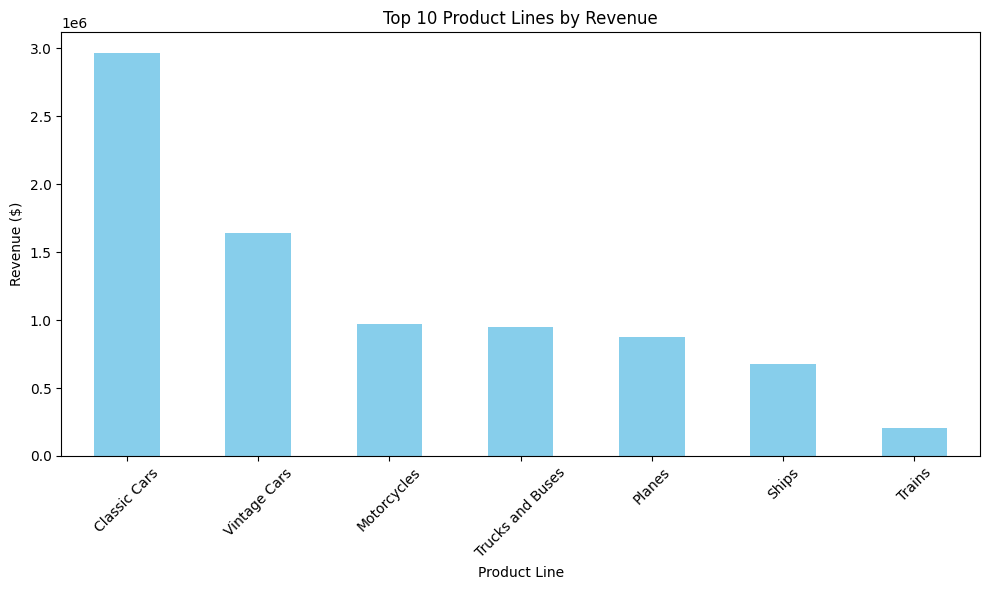

In [15]:
# ---------- 2. Top 10 Product Lines by Revenue ----------
top_products = df.groupby('PRODUCTLINE')['TotalRevenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Product Lines by Revenue")
plt.ylabel("Revenue ($)")
plt.xlabel("Product Line")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


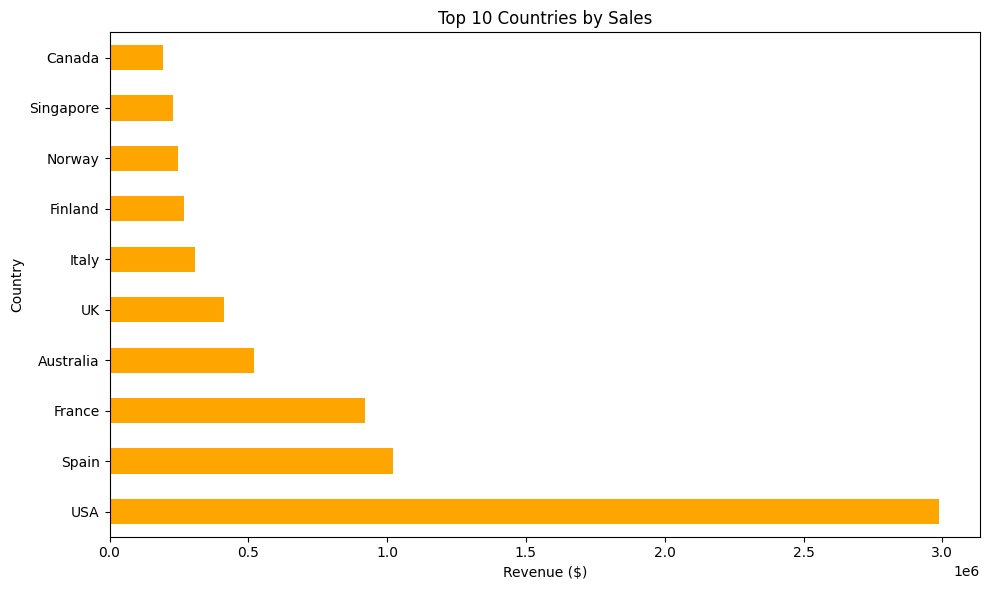

In [16]:
# ---------- 3. Top 10 Countries by Sales ----------
top_countries = df.groupby('COUNTRY')['TotalRevenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_countries.plot(kind='barh', color='orange')
plt.title("Top 10 Countries by Sales")
plt.xlabel("Revenue ($)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


In [17]:
pip install prophet


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
    ----------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Importing plotly failed. Interactive plots will not work.
16:56:15 - cmdstanpy - INFO - Chain [1] start processing
16:56:16 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\mohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


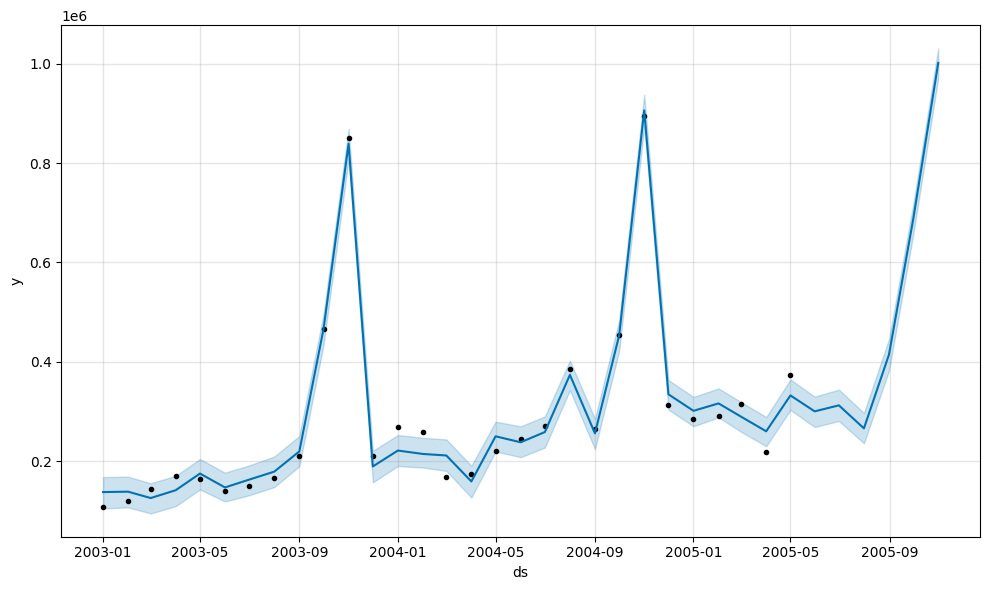

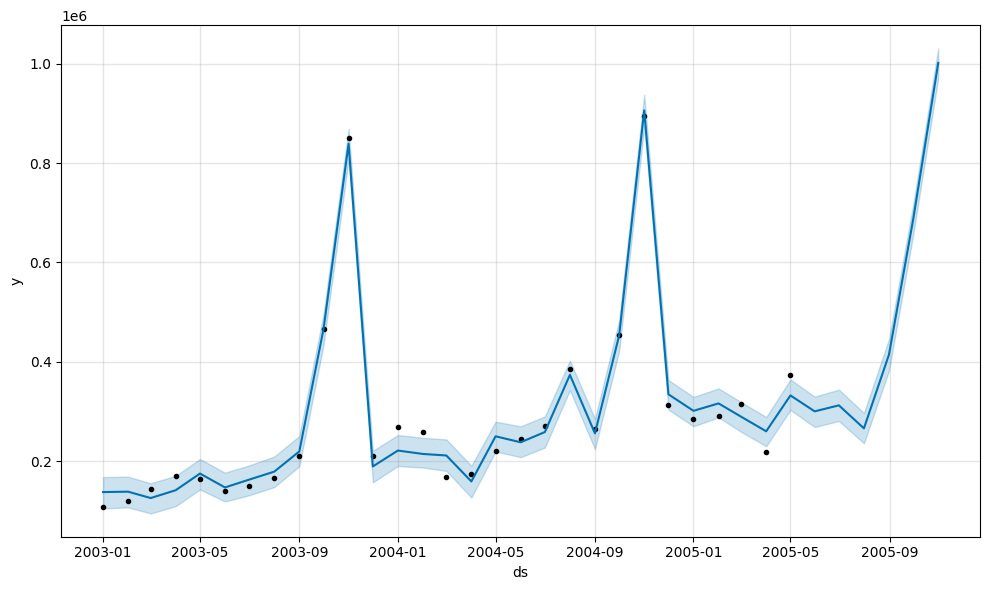

In [18]:
from prophet import Prophet

# Prepare data
monthly = df.groupby(df['ORDERDATE'].dt.to_period('M'))['TotalRevenue'].sum().reset_index()
monthly['ds'] = monthly['ORDERDATE'].dt.to_timestamp()
monthly['y'] = monthly['TotalRevenue']

# Fit model
model = Prophet()
model.fit(monthly[['ds', 'y']])

# Predict next 6 months
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

# Plot
model.plot(forecast)


In [20]:
import os

# Old and new file names
old_file = "sales_data_sample.csv"
new_file = "final_sales_data.csv"

# Rename
os.rename(old_file, new_file)

print("File renamed successfully.")


File renamed successfully.
